# 🛒 Customer Segmentation (K-Means & DBSCAN)

### Task 2: Customer Segmentation
- Dataset: Mall Customers (Kaggle)
- Objective: Cluster customers into groups based on **Annual Income** and **Spending Score**
- Tools: Python, Pandas, Matplotlib, Scikit-learn

We will:
1. Load and explore the dataset
2. Scale features
3. Apply **K-Means clustering** and find optimal K (Elbow + Silhouette)
4. Visualize clusters
5. Analyze average spending per cluster
6. (Bonus) Analyze average spending per cluster
7. (Bonus) Try **DBSCAN** clustering
 



In [1]:
# Step 1: Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

RANDOM_STATE = 42


In [2]:
# Step 2: Load dataset
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# Quick info
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
# Step 3: Select features (Annual Income & Spending Score)
X = df[["Annual Income (k$)", "Spending Score (1-100)"]]
X.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [5]:
# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992]])

c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when

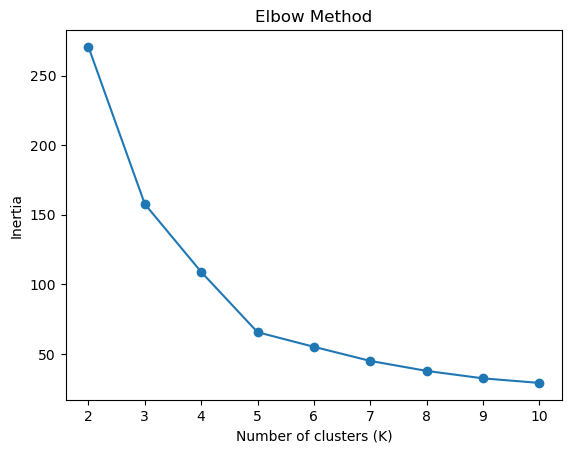

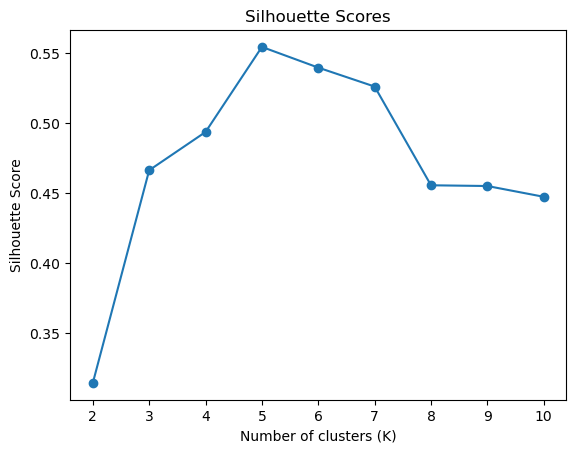

Best K (by silhouette): 5


In [6]:
# Step 5: Find optimal K (Elbow + Silhouette)
k_values = range(2, 11)
inertias, sil_scores = [], []

for k in k_values:
    km = KMeans(n_clusters=k, n_init=10, random_state=RANDOM_STATE)
    labels = km.fit_predict(X_scaled)
    inertias.append(km.inertia_)
    sil_scores.append(silhouette_score(X_scaled, labels))

# Elbow Plot
plt.plot(k_values, inertias, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.show()

# Silhouette Plot
plt.plot(k_values, sil_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.show()

best_k = k_values[int(np.argmax(sil_scores))]
print("Best K (by silhouette):", best_k)

In [7]:
# Step 6: Apply KMeans with best K
kmeans = KMeans(n_clusters=best_k, n_init=10, random_state=RANDOM_STATE)
df["cluster"] = kmeans.fit_predict(X_scaled)

# Get cluster centers in original units
centers = scaler.inverse_transform(kmeans.cluster_centers_)
centers_df = pd.DataFrame(centers, columns=X.columns)
centers_df

c:\Users\a\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Annual Income (k$),Spending Score (1-100)
0,55.296296,49.518519
1,88.200000,17.114286
2,26.304348,20.913043
3,25.727273,79.363636
4,86.538462,82.128205


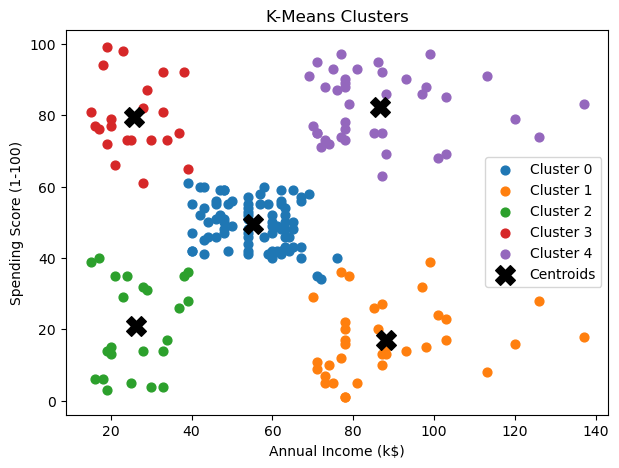

In [8]:
# Step 7: Visualize clusters
plt.figure(figsize=(7,5))
for c in sorted(df["cluster"].unique()):
    plt.scatter(df.loc[df.cluster==c, "Annual Income (k$)"],
                df.loc[df.cluster==c, "Spending Score (1-100)"],
                s=40, label=f"Cluster {c}")
plt.scatter(centers_df["Annual Income (k$)"], centers_df["Spending Score (1-100)"],
            c='black', marker='X', s=200, label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clusters")
plt.legend()
plt.show()

## Bonus: Analyze average spending per cluster


In [9]:
# Step 8: Analyze clusters
summary = df.groupby("cluster").agg(
    count=("cluster","size"),
    avg_income=("Annual Income (k$)","mean"),
    avg_spend=("Spending Score (1-100)","mean")
).round(2)
summary

,count,avg_income,avg_spend
cluster,,,
0,81,55.30,49.52
1,35,88.20,17.11
2,23,26.30,20.91
3,22,25.73,79.36
4,39,86.54,82.13


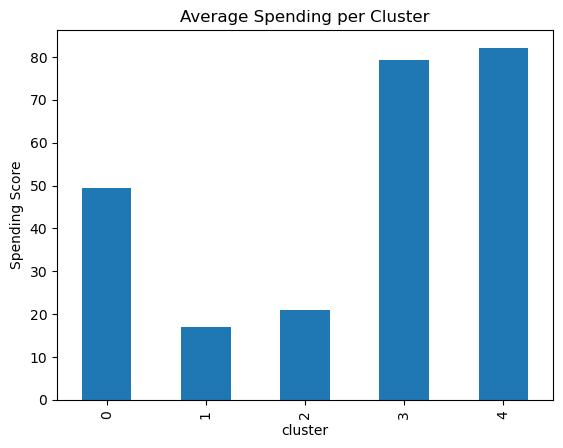

In [10]:
# Plot average spending per cluster
summary["avg_spend"].plot(kind="bar")
plt.title("Average Spending per Cluster")
plt.ylabel("Spending Score")
plt.show()

## Bonus: DBSCAN
- Density-based clustering algorithm
- Can detect noise and non-spherical clusters


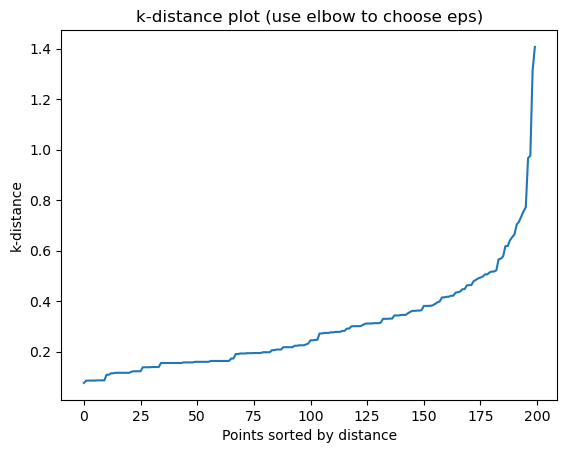

eps=0.20 -> clusters=4, noise=95
eps=0.30 -> clusters=6, noise=48
eps=0.40 -> clusters=4, noise=19
eps=0.50 -> clusters=2, noise=11
eps=0.60 -> clusters=1, noise=6
eps=0.80 -> clusters=1, noise=0
eps=1.00 -> clusters=1, noise=0


In [11]:
# Step 9: DBSCAN - Find good eps with k-distance sweep
from sklearn.neighbors import NearestNeighbors

Xd = StandardScaler().fit_transform(X)

# 1) k-distance plot (use k = min_samples = 6)
min_samples = 6
neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(Xd)
distances, indices = neighbors_fit.kneighbors(Xd)

# Sort distances to see the "elbow"
distances = np.sort(distances[:, -1])
plt.plot(distances)
plt.title("k-distance plot (use elbow to choose eps)")
plt.xlabel("Points sorted by distance")
plt.ylabel("k-distance")
plt.show()

# 2) Try multiple eps values to see results
for eps in [0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0]:
    db = DBSCAN(eps=eps, min_samples=min_samples).fit(Xd)
    labels = db.labels_
    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    print(f"eps={eps:.2f} -> clusters={n_clusters}, noise={list(labels).count(-1)}")


In [12]:
# Step 9: DBSCAN
Xd = StandardScaler().fit_transform(X)
db = DBSCAN(eps=0.4, min_samples=6)
df["dbscan_cluster"] = db.fit_predict(Xd)
df["dbscan_cluster"].value_counts()

dbscan_cluster
 0    112
 2     32
 3     26
-1     19
 1     11
Name: count, dtype: int64

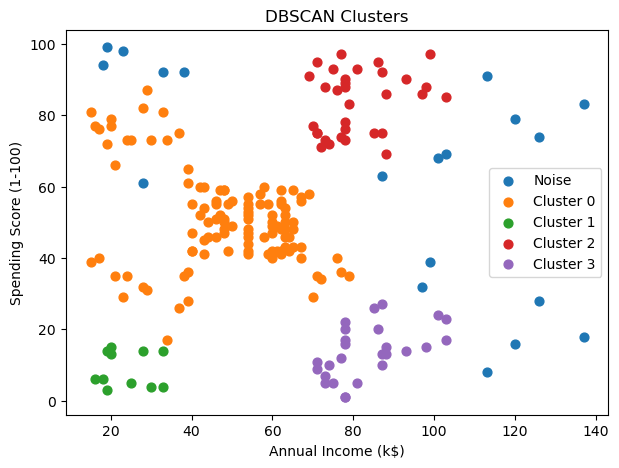

In [13]:
# Visualize DBSCAN
plt.figure(figsize=(7,5))
for c in sorted(set(df["dbscan_cluster"])):
    subset = df[df.dbscan_cluster==c]
    label = "Noise" if c==-1 else f"Cluster {c}"
    plt.scatter(subset["Annual Income (k$)"], subset["Spending Score (1-100)"], s=40, label=label)
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("DBSCAN Clusters")
plt.legend()
plt.show()

In [14]:
# Analyze DBSCAN clusters (excluding noise)
db_summary = df[df.dbscan_cluster!=-1].groupby("dbscan_cluster").agg(
    count=("dbscan_cluster","size"),
    avg_income=("Annual Income (k$)","mean"),
    avg_spend=("Spending Score (1-100)","mean")
).round(2)
db_summary

,count,avg_income,avg_spend
dbscan_cluster,,,
0,112,48.71,50.93
1,11,23.73,8.91
2,32,80.88,83.62
3,26,83.42,13.77
